#Projeto: Análise de Evasão de Clientes - Telecom X

#Objetivo
Entender os fatores que levam ao cancelamento de clientes, utilizando dados obtidos por API, com foco em ETL, visualização e análise exploratória.

# Etapa 1: Importação e Coleta de Dados (Extração)

In [6]:
import requests
import pandas as pd

# Suponha que a API seja essa (substitua pela real)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json"
response = requests.get(url)

# Verificando status
if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print(f"Erro ao acessar a API: {response.status_code}")


#Etapa 2: Transformação (Tratamento de Dados)

In [ ]:
import requests

dict_url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_dicionario.md"
response = requests.get(dict_url)
md_text = response.text

print(md_text) #mostra o texto

In [48]:
df.info() #visualizar dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
df.head(3) #visualizar as 3 primeiras linhas da tabela.

In [44]:
# Limpando dados nulos
df.dropna(inplace=True)

In [52]:
variaveis_uteis = ['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

df_selected = df[variaveis_uteis]
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [53]:
df_selected.head(3)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [54]:
# Total de valores ausentes por coluna
print("🔎 Valores ausentes:")
print(df_selected.isnull().sum())

# Ou percentual de nulos por coluna
print("\n📉 Percentual de nulos:")
print((df_selected.isnull().mean() * 100).round(2))


🔎 Valores ausentes:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

📉 Percentual de nulos:
customerID    0.0
Churn         0.0
customer      0.0
phone         0.0
internet      0.0
account       0.0
dtype: float64


In [56]:
for col in df_selected.columns:
    if df_selected[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"🧱 Coluna '{col}' ainda contém dicionários.")


🧱 Coluna 'customer' ainda contém dicionários.
🧱 Coluna 'phone' ainda contém dicionários.
🧱 Coluna 'internet' ainda contém dicionários.
🧱 Coluna 'account' ainda contém dicionários.


In [57]:
colunas_remover = [col for col in df_selected.columns if df_selected[col].apply(lambda x: isinstance(x, dict)).any()]
print(f"Removendo colunas com dict: {colunas_remover}")
df_selected = df_selected.drop(columns=colunas_remover)


Removendo colunas com dict: ['customer', 'phone', 'internet', 'account']


In [58]:
# Duplicados completos
duplicados = df_selected.duplicated().sum()
print(f"🧾 Registros completamente duplicados: {duplicados}")

# Duplicados por ID
duplicados_id = df_selected['customerID'].duplicated().sum()
print(f"📎 customerID duplicados: {duplicados_id}")


🧾 Registros completamente duplicados: 0
📎 customerID duplicados: 0


#Etapa 3: Carga (Preparação final)

In [61]:
# Salvando localmente ou para outro sistema
df.to_csv('clientes_tratados.csv', index=False)


#Etapa 4: Visualizações Estratégicas

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns


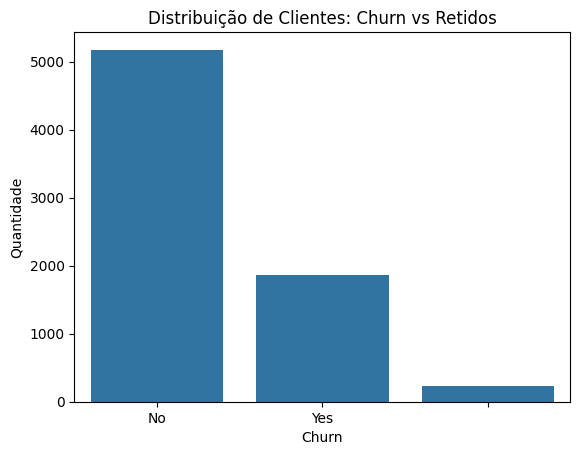

In [67]:
sns.countplot(x='Churn', data=df)
plt.title('Distribuição de Clientes: Churn vs Retidos')
plt.xlabel('Churn')
plt.ylabel('Quantidade')
plt.show()